# ML Lab Session 02
Subject: 23CSE301
BL.EN.U4CSE23219



## a1: Matrix dimensionality, rank, vector space, Factorization & Pseudo Inverse

In [3]:
#importng libraries
import pandas as pd
import numpy as np
#read csv file after loading it
df = pd.read_csv("/content/drive/MyDrive/ML Datasets/Purchase data.csv")
#selects needed columns
df = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna() #dropna() removes rows with missing values NaN
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy() #matrix of purchases rows->one customer's shopping,  Columns -> number of Candies, Mangoes, Milk.
C = df[['Payment (Rs)']].to_numpy() #total bill of each customer (dependent variable)
print("Dimensionality of vector space:", A.shape[1])
print("Number of vectors:", A.shape[0])
print("Rank of matrix A:", np.linalg.matrix_rank(A))
X = np.linalg.pinv(A) @ C #calculates psuedo inverse of a function after finding least squares of a cuz a is not square
print("Cost per product (Candy, Mango, Milk):", X.flatten().round(2))

Dimensionality of vector space: 3
Number of vectors: 10
Rank of matrix A: 3
Cost per product (Candy, Mango, Milk): [ 1. 55. 18.]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## A2: Classifier Model - Rich vs Poor

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
df = pd.read_csv("/content/drive/MyDrive/ML Datasets/Purchase data.csv")
df = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()
df['Label'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR') #creating labels if >200->rich else poor
X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']] #inputs (shopping basket)
y = df['Label'] #output (RICH / POOR)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #Splits data into training set->used to fit the model and Testing set -> used to evaluate the model and random_state=0 makes sure split is reproducible (same shuffle every time)
model = LogisticRegression() #Logistic regression uses the sigmoid function to map outputs into probabilities between 0 and 1.
model.fit(X_train, y_train) #fitting model of logistic regression
y_pred = model.predict(X_test) #prediction of output values after training using test data points
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        POOR       1.00      1.00      1.00         1
        RICH       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



## A3: IRCTC Stock Price Analysis calculation of mean, variance


---



Population mean price: Rs. 1560.66
Population price variance: 58732.37
Wednesday mean price: Rs. 1550.71
Difference from overall mean: -9.96
April mean price: Rs. 1698.95
Difference from overall mean: 138.29
Probability of stock loss: 0.48
Probability of profit on Wednesdays: 0.42
Conditional probability of profit given it's Wednesday: 0.42


/tmp/ipython-input-2987813893.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Day', y='Chg%', data=df, jitter=True, palette='Set2', size=6) #Strip plot: scatter plot with some jitter (to avoid overlap)


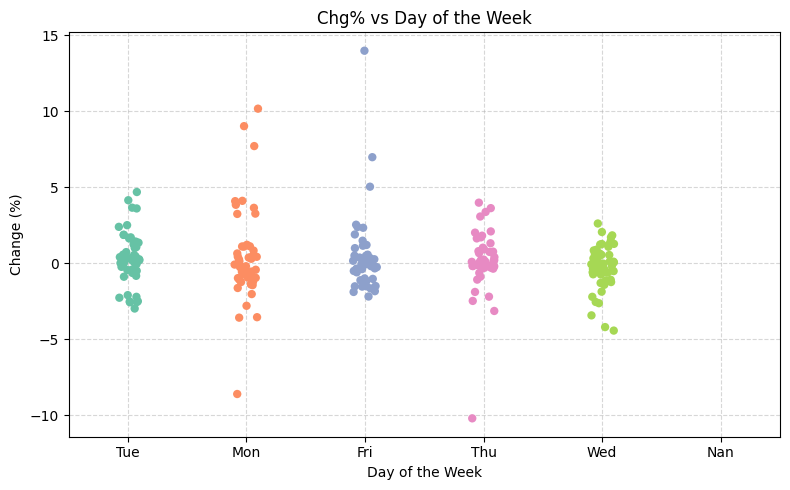

In [5]:
#importing libraries
import pandas as pd
from statistics import mean, variance
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_irctc(stock_df): #This function takes in a DataFrame containing all stock info.
    df = stock_df.copy()
    # Cleaning Price column
    df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)
    # Cleaning Chg% column
    df['Chg%'] = df['Chg%'].astype(str).str.replace('%', '', regex=False)
    df['Chg%'] = pd.to_numeric(df['Chg%'], errors='coerce')
    # Calculations
    price_mean = df['Price'].mean()#Overall average price.
    price_var = df['Price'].var() #Overall variance.
    #Subset= taking only Wednesday data and only April data
    wednesdays = df[df['Day'].str.strip().str.lower() == 'wed']
    april = df[df['Month'].str.strip().str.lower() == 'apr']
    wednesday_mean = wednesdays['Price'].mean() #wednesday mean calculation
    april_mean = april['Price'].mean() #april mean calculation
    p_loss = (df['Chg%'] < 0).mean() #(df['Chg%']<0)=gives True/False for each row and .mean() on booleans gives proportion= probability of loss.
    p_profit_on_wed = (wednesdays['Chg%'] > 0).mean() #Probability of profit if it’s Wednesday

    # Printing the results
    print(f"Population mean price: Rs. {price_mean:.2f}")
    print(f"Population price variance: {price_var:.2f}")
    print(f"Wednesday mean price: Rs. {wednesday_mean:.2f}")
    print(f"Difference from overall mean: {wednesday_mean - price_mean:.2f}")
    print(f"April mean price: Rs. {april_mean:.2f}")
    print(f"Difference from overall mean: {april_mean - price_mean:.2f}")
    print(f"Probability of stock loss: {p_loss:.2f}")
    print(f"Probability of profit on Wednesdays: {p_profit_on_wed:.2f}")
    print(f"Conditional probability of profit given it's Wednesday: {p_profit_on_wed:.2f}")

    return df
#graph plotting function
def plot_chg_percent_vs_day(df):
    df = df.copy()
    df['Day'] = df['Day'].astype(str).str.strip().str.capitalize() #cleaning up day names
    plt.figure(figsize=(8, 5))
    sns.stripplot(x='Day', y='Chg%', data=df, jitter=True, palette='Set2', size=6) #Strip plot: scatter plot with some jitter (to avoid overlap)
    plt.title('Chg% vs Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Change (%)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# === Main Execution ===
if __name__ == '__main__':
    # Load CSV into DataFrame
    irctc_data = pd.read_csv("/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv")

    # Pass the DataFrame into the function
    cleaned_irctc = analyze_irctc(irctc_data)

    # Plotting
    plot_chg_percent_vs_day(cleaned_irctc)


## A4: Thyroid Dataset Exploration

In [6]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

print("Data types of each column:\n")
print(df.dtypes)
print("\n Encoding Suggestions:")
for col in df.columns:
    if df[col].dtype == 'object': #if type of object then one hot
        print(f"- {col}: One-Hot Encoding (Nominal/categorical)")
    elif df[col].dtype in ['int64', 'float64']: #if type numeric and has few unique values then label
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) <= 10:
            print(f"- {col}: Label Encoding (Likely Ordinal)")
        else: #if many unique values then no encoding required
            print(f"- {col}: Numeric (No encoding needed)")
print("\n Data range for numeric columns:\n")
print(df.describe(include='number'))
print("\n Missing values in each column:\n")
print(df.isnull().sum())
print("\n Outlier summary (using IQR method):")
for col in df.select_dtypes(include='number').columns:
    series = df[col].dropna()
    if series.empty:
        print(f"- {col}: Skipped (no valid numeric data)")
        continue
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    if IQR == 0:
        print(f"- {col}: Skipped (IQR = 0, all values nearly same)")
    else:
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        print(f"- {col}: {len(outliers)} outliers")


print("\n Mean and Standard Deviation for numeric columns:")
for col in df.select_dtypes(include='number').columns:
    values = df[col].dropna()
    if values.empty:
        print(f"- {col}: Skipped (all values are NaN)")
    else:
        print(f"- {col}: Mean = {values.mean():.2f}, Std = {values.std():.2f}")


Data types of each column:

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object


## A5: Jaccard & SMC Similarity Measure (Binary Attributes)

In [7]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

print(" Data types of each column:\n")
print(df.dtypes)


print("\nEncoding Suggestions:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"- {col}: One-Hot Encoding (Nominal)")
    elif df[col].dtype in ['int64', 'float64']:
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) <= 10:
            print(f"- {col}: Label Encoding (Likely Ordinal)")
        else:
            print(f"- {col}: Numeric (No encoding needed)")


print("\n Data range for numeric columns:\n")
print(df.describe(include='number')) #shows summary stats for numeric columns

print("\n Missing values in each column:\n")
print(df.isnull().sum()) #returns count of NaN per column


print("\n Outlier summary (using IQR method):")
for col in df.select_dtypes(include='number').columns:
    series = df[col].dropna()
    if series.empty:
        print(f"- {col}: Skipped (no valid numeric data)")
        continue
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    if IQR == 0:
        print(f"- {col}: Skipped (IQR = 0, all values nearly same)")
    else:
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        print(f"- {col}: {len(outliers)} outliers")


print("\n Mean and Standard Deviation for numeric columns:")
for col in df.select_dtypes(include='number').columns:
    values = df[col].dropna()
    if values.empty:
        print(f"- {col}: Skipped (all values are NaN)")
    else:
        print(f"- {col}: Mean = {values.mean():.2f}, Std = {values.std():.2f}")


 Data types of each column:

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object

## A6: Cosine Similarity (Full Vectors)

In [8]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
binary_cols = []
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    if set(unique_vals).issubset({'t', 'f'}): #Checks if all values are only 't' or 'f' (ignoring NaN)
        binary_cols.append(col)
binary_df = df[binary_cols].replace({'t': 1, 'f': 0})
v1 = binary_df.iloc[0]
v2 = binary_df.iloc[1]
f11 = ((v1 == 1) & (v2 == 1)).sum() #Counts how many columns are 1 in both v1 and v2.
f00 = ((v1 == 0) & (v2 == 0)).sum() #Counts how many columns are 0 in both v1 and v2
f10 = ((v1 == 1) & (v2 == 0)).sum() #Counts how many columns are 1 in v1 but 0 in v2.
f01 = ((v1 == 0) & (v2 == 1)).sum() #Counts how many columns are 0 in v1 but 1 in v2


jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else "Undefined" #jaccard similarty measure
smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else "Undefined" #simple matching coefficient


print("Binary Columns Used:", binary_cols)
print("f11 (1 in both):", f11)
print("f00 (0 in both):", f00)
print("f10 (1 in v1 only):", f10)
print("f01 (1 in v2 only):", f01)
print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)


Binary Columns Used: ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']
f11 (1 in both): 1
f00 (0 in both): 16
f10 (1 in v1 only): 1
f01 (1 in v2 only): 2
Jaccard Coefficient (JC): 0.25
Simple Matching Coefficient (SMC): 0.85


/tmp/ipython-input-3122906413.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_df = df[binary_cols].replace({'t': 1, 'f': 0})


## A7: Cosine Similarity


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from numpy import dot
from numpy.linalg import norm


df = pd.read_excel("/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
df = df.dropna(how='all') #Removes rows that are completely empty (all NaNs)
df = df.fillna(0) #Replaces all other missing values with 0
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str)) #Converts categories into integers
A = df.iloc[0].values
B = df.iloc[1].values
cosine_similarity = dot(A, B) / (norm(A) * norm(B))
print("Cosine Similarity between Row 1 and Row 2:", round(cosine_similarity, 4))


Cosine Similarity between Row 1 and Row 2: 1.0


## A8: Data Imputation for Missing Values heatmap comparision for similarity measures

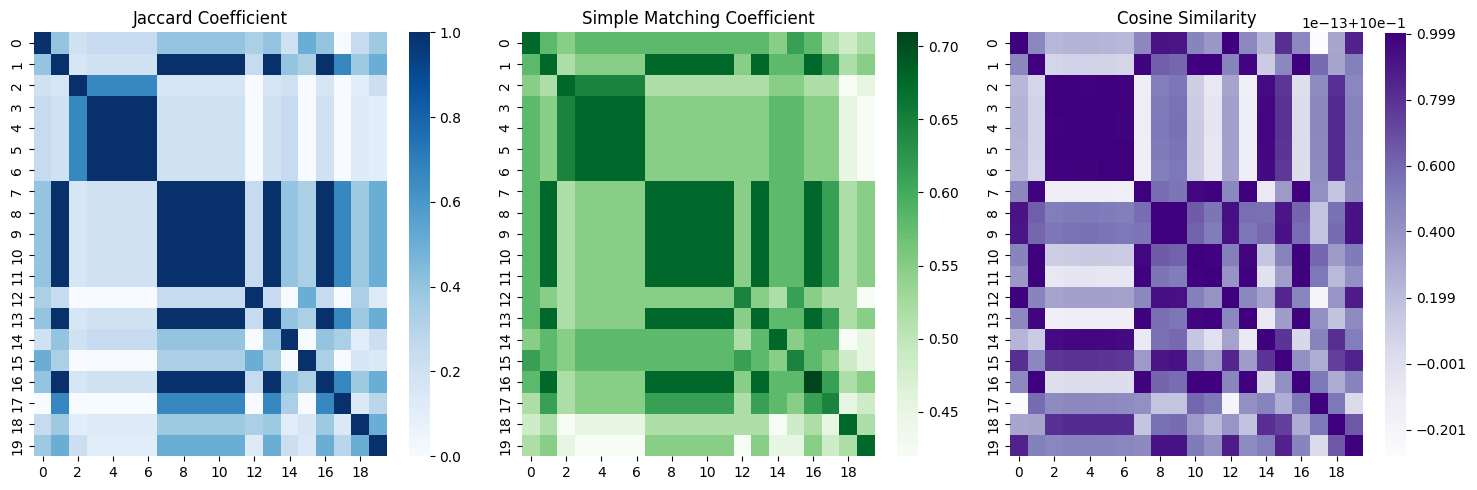

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from numpy import dot
from numpy.linalg import norm


df = pd.read_excel("/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
df = df.dropna(how='all').fillna(0)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df20 = df.iloc[:20]
def jaccard(v1, v2):
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f10 = np.sum((v1 == 1) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))
    denom = f11 + f10 + f01
    return f11 / denom if denom else 0

def smc(v1, v2):
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f00 = np.sum((v1 == 0) & (v2 == 0))
    total = len(v1)
    return (f11 + f00) / total

def cosine(v1, v2):
    return dot(v1, v2) / (norm(v1) * norm(v2)) if norm(v1) * norm(v2) != 0 else 0


n = 20
JC = np.zeros((n, n))
SMC = np.zeros((n, n))
COS = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        JC[i][j] = jaccard(df20.iloc[i], df20.iloc[j])
        SMC[i][j] = smc(df20.iloc[i], df20.iloc[j])
        COS[i][j] = cosine(df20.iloc[i], df20.iloc[j])
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(JC, annot=False, cmap='Blues')
plt.title("Jaccard Coefficient")
plt.subplot(1, 3, 2)
sns.heatmap(SMC, annot=False, cmap='Greens')
plt.title("Simple Matching Coefficient")
plt.subplot(1, 3, 3)
sns.heatmap(COS, annot=False, cmap='Purples')
plt.title("Cosine Similarity")
plt.tight_layout()
plt.show()


## A9: Data Normalization / Scaling

In [8]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any()
            if outliers:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mean())

print(" Missing values have been filled appropriately.")


 Missing values have been filled appropriately.


In [9]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(" Numeric values have been normalized using Min-Max Scaling.")
print(df[numeric_cols].head())


 Numeric values have been normalized using Min-Max Scaling.
      Record ID       age
0  0.000000e+00  0.000427
1  3.410871e-08  0.000427
2  9.891527e-07  0.000610
3  6.934301e-05  0.000534
4  6.937712e-05  0.000473
